In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import io
import requests
import plotly as px
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('population_structure_by_age_per_contry.csv')
print(df.columns)
df.shape

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')


(213, 4)

In [29]:
df1=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
print(df1.shape)
df1.columns

(6603, 9)


Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [30]:
s=df.append(df1)

In [35]:
df1.head(5)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [32]:
df.head(2)

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142


In [33]:
df1.count()

Date                   6603
Country                6603
Population             6603
Total Tests            5505
Total Cases            6554
Total Deaths           5367
Total Recovered        6318
Serious or Critical    4117
Active Cases           6544
dtype: int64

In [34]:
df1.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [36]:
df1.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


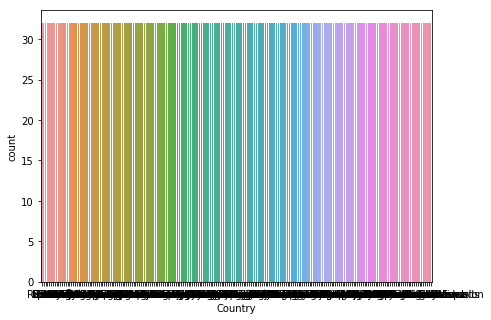

In [18]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.countplot(df['Country'])

In [21]:
df1['Country'].value_counts()

Nepal                     31
Romania                   31
North Macedonia           31
Saint Pierre Miquelon     31
Cayman Islands            31
Barbados                  31
Hungary                   31
Mayotte                   31
Lebanon                   31
Dominican Republic        31
Uganda                    31
Kenya                     31
Zambia                    31
El Salvador               31
Mozambique                31
Singapore                 31
Turkey                    31
Ecuador                   31
Mexico                    31
Yemen                     31
Andorra                   31
New Zealand               31
Estonia                   31
Jordan                    31
Philippines               31
Nigeria                   31
Caribbean Netherlands     31
CAR                       31
St. Vincent Grenadines    31
Aruba                     31
                          ..
Eritrea                   31
Ivory Coast               31
Jamaica                   31
Djibouti      

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

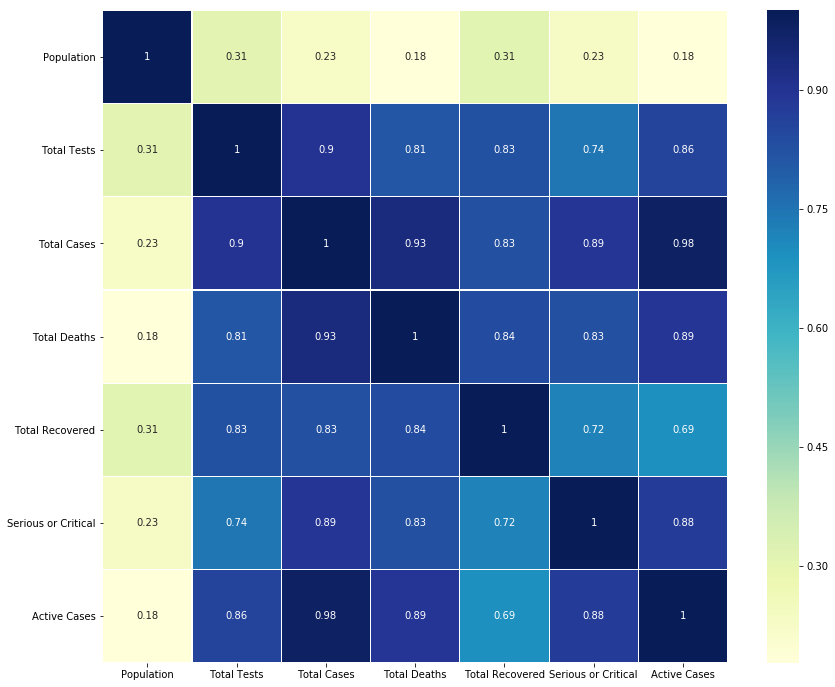

In [23]:
plt.figure(figsize=(14,12))
sns.heatmap(df1.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In [40]:
import plotly.express as px

fig = px.scatter(df1, x='Total Deaths', y="Total Cases",color="Date")
fig.show()

In [43]:
#Overall 
import plotly.graph_objs as go
rvd = df1['Total Recovered'].sum()
dth = df1['Total Deaths'].sum()
ac=df1['Active Cases'].sum()
gh=df1['Serious or Critical'].sum()
fig = go.Figure(data=[go.Pie(labels=['Recovered','Deaths','active','Serious or critical'],
                             values= [rvd,dth,ac,gh],hole =.3)])
fig.update_layout(title_text='Current Situation inWorld India according WHO',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [44]:
rvd = df1['Total Tests'].sum()
dth = df1['Total Deaths'].sum()
fig = go.Figure(data=[go.Pie(labels=['Tests','Deaths'],
                             values= [rvd,dth],hole =.3)])
fig.update_layout(title_text='Current Situation inWorld India according WHO',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

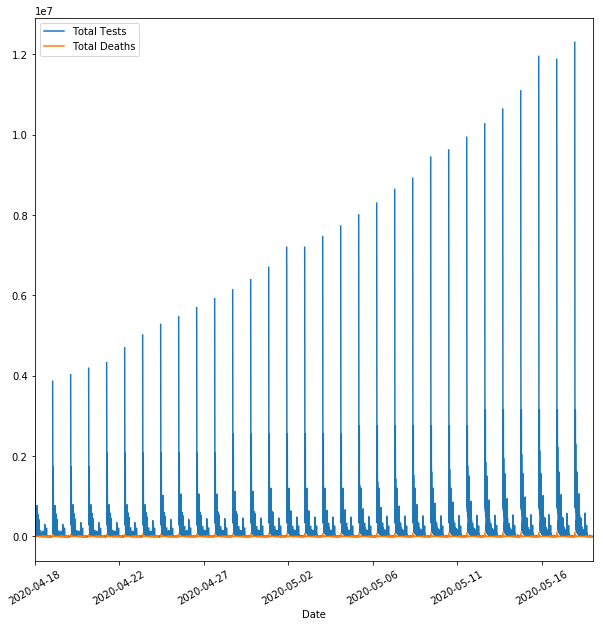

In [46]:
df1.plot('Date',['Total Tests', 'Total Deaths'],figsize=(10,10), rot=30)

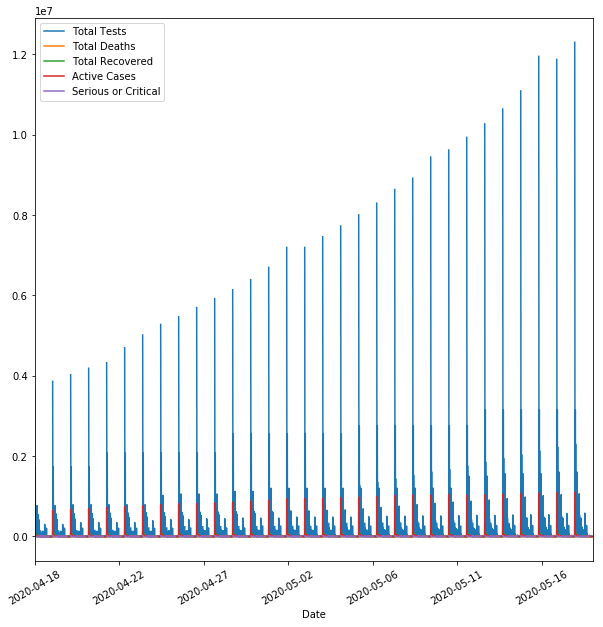

In [49]:
df1.plot('Date',['Total Tests', 'Total Deaths','Total Recovered', 'Active Cases','Serious or Critical'],figsize=(10,10), rot=30)

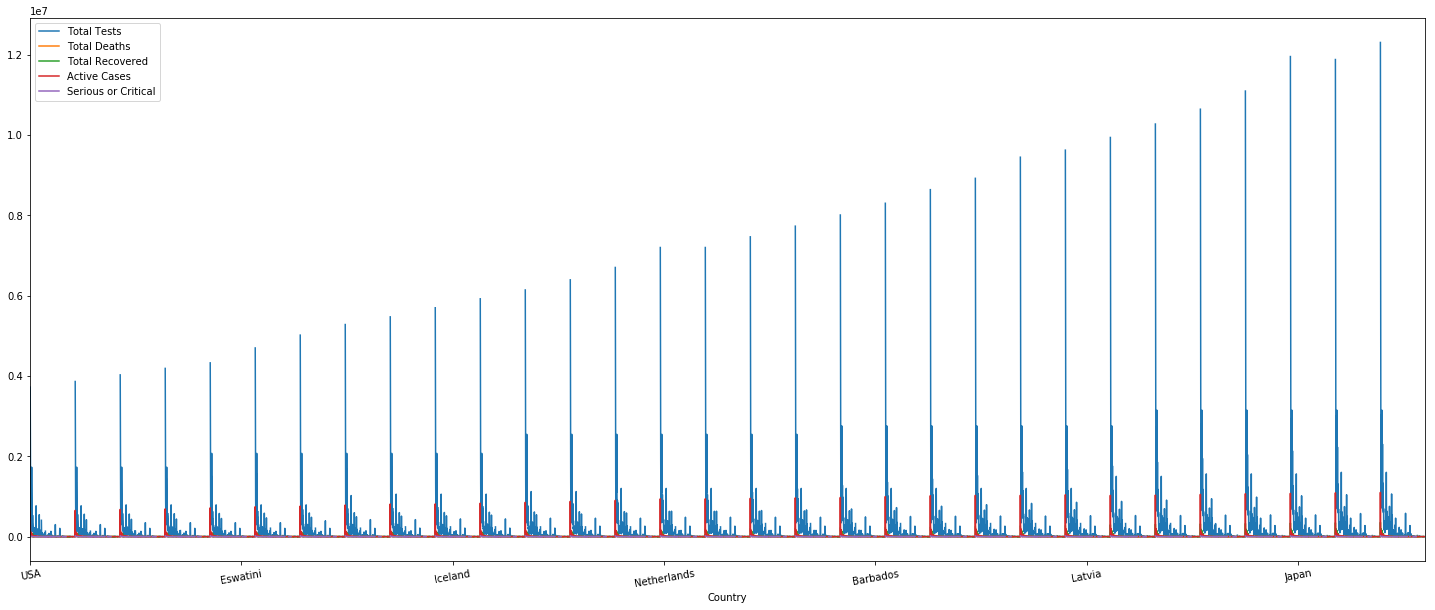

In [67]:
df1.plot('Country',['Total Tests', 'Total Deaths','Total Recovered', 'Active Cases','Serious or Critical'],figsize=(25,10), rot=10)

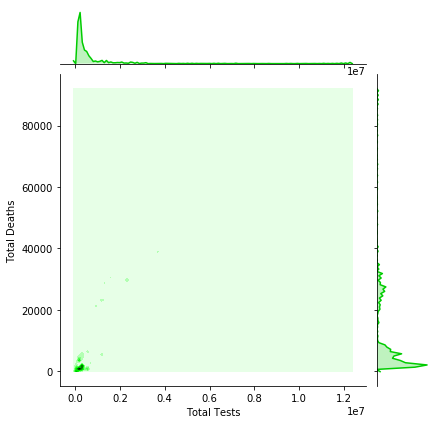

In [52]:
sns.jointplot(df1['Total Tests'] ,df1['Total Deaths'], color="#00cc00",kind='kde')#density plot

In [ ]:
df1['Total Tests']=df1.dropna(df1['Total Tests'],axis=0)

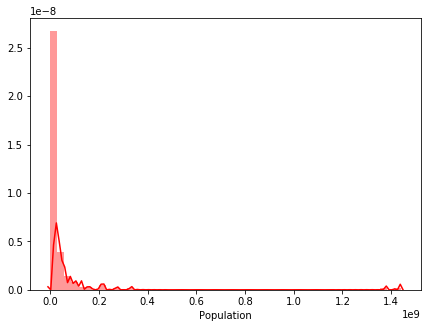

In [73]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df1['Population'], color = 'r')

In [ ]:
fig, axe = plt.subplots(figsize = [7, 5])4
sns.distplot(df1['Active Cases'], color = 'r')